In [1]:
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(viridis))
suppressPackageStartupMessages(library(RColorBrewer))
suppressPackageStartupMessages(library(reshape2))
suppressPackageStartupMessages(library(dplyr))

In [2]:
setwd('/home/ejam/documents/barley_stacks/preproc/norm_ect/results')
norm <- 'Normalized Size'
d <- 158
TT <- 8
founders <- read.csv(paste('combined_d',d,'_T',TT,'.csv',sep=''))

In [3]:
founders_names_original <- levels(unique(founders$Founder))
founders_names <- founders_names_original
founders_names[5] <- 'CA Mariout'
founders_names[11] <- 'Good Delta'
founders_names[17] <- 'Maison Carree'
founders_names[24] <- 'Palmella Blue'
founders_names[28] <- 'WI Winter'
print(founders_names)

 [1] "Algerian"        "Alpha"           "Arequipa"        "Atlas"          
 [5] "CA Mariout"      "Club Mariout"    "Everest"         "Flynn"          
 [9] "Glabron"         "Golden Pheasant" "Good Delta"      "Han River"      
[13] "Hannchen"        "Horn"            "Lion"            "Lyallpur"       
[17] "Maison Carree"   "Manchuria"       "Meloy"           "Minia"          
[21] "Multan"          "Oderbrucker"     "Orel"            "Palmella Blue"  
[25] "Sandrel"         "Trebi"           "White Smyrna"    "WI Winter"      


In [4]:
dim(founders)

meta_info <- colnames(founders)[1:9]
print(meta_info)
trad_traits <- colnames(founders)[10:20]
print(trad_traits)
topo_traits <- colnames(founders)[21:ncol(founders)]
print(topo_traits[1:10])

[1] 3121 1284

[1] "Scan"            "Color"           "Generation"      "Selection"      
[5] "Progeny"         "Label..C.G.S.P." "Founder"         "Label"          
[9] "Tag"            
 [1] "Length"          "Width"           "Height"          "HeightMax"      
 [5] "Shell"           "Area"            "Vol"             "ConvexArea"     
 [9] "ConvexVol"       "ConvexAreaRatio" "ConvexVolRatio" 
 [1] "X7"  "X15" "X23" "X31" "X39" "X47" "X55" "X63" "X71" "X79"


In [5]:
direction <- 1
ect_traits <- topo_traits[(TT*(direction-1)+1):(TT*direction)]
ect_traits
parent <- 'Minia'
ect <- founders[founders['Founder'] == parent, ect_traits]
ect

[1] "X7"  "X15" "X23" "X31" "X39" "X47" "X55" "X63"

,X7,X15,X23,X31,X39,X47,X55,X63
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
523,5,0,0,1,1,1,1,1
524,2,7,0,1,1,1,1,1
525,1,1,1,1,1,1,1,1
526,-9,0,0,1,1,1,1,1
527,2,0,1,1,1,1,1,1
528,5,2,-1,1,1,1,1,1
529,4,4,0,1,1,1,1,1
530,27,2,-2,1,1,1,1,1
531,-14,-2,3,1,1,1,1,1


In [179]:
sumary <- t(sapply(ect, function(x) c(mean=mean(x), var=var(x), sd=sd(x),
                                      box=grDevices::boxplot.stats(x)$stats)))
dfsumary <- as.data.frame(sumary)
dfsumary['threshold'] <- 1:TT
dfsumary['upper'] <- sumary[,1] + sumary[,3]
dfsumary['lower'] <- sumary[,1] - sumary[,3]
dfsumary

,mean,var,sd,box1,box2,box3,box4,box5,threshold,upper,lower
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
X5511,1.2086957,2.061327231,1.43573230,0,1,1,2,3,1,2.644428,-0.2270366
X5519,1.0521739,0.593745233,0.77054866,1,1,1,1,1,2,1.822723,0.2816253
X5527,0.9304348,0.275819985,0.52518567,1,1,1,1,1,3,1.455620,0.4052491
X5535,1.0000000,0.175438596,0.41885391,1,1,1,1,1,4,1.418854,0.5811461
X5543,1.0434783,0.077040427,0.27756157,1,1,1,1,1,5,1.321040,0.7659167
X5551,1.0086957,0.008695652,0.09325048,1,1,1,1,1,6,1.101946,0.9154452
X5559,1.0000000,0.000000000,0.00000000,1,1,1,1,1,7,1.000000,1.0000000
X5567,1.0000000,0.000000000,0.00000000,1,1,1,1,1,8,1.000000,1.0000000


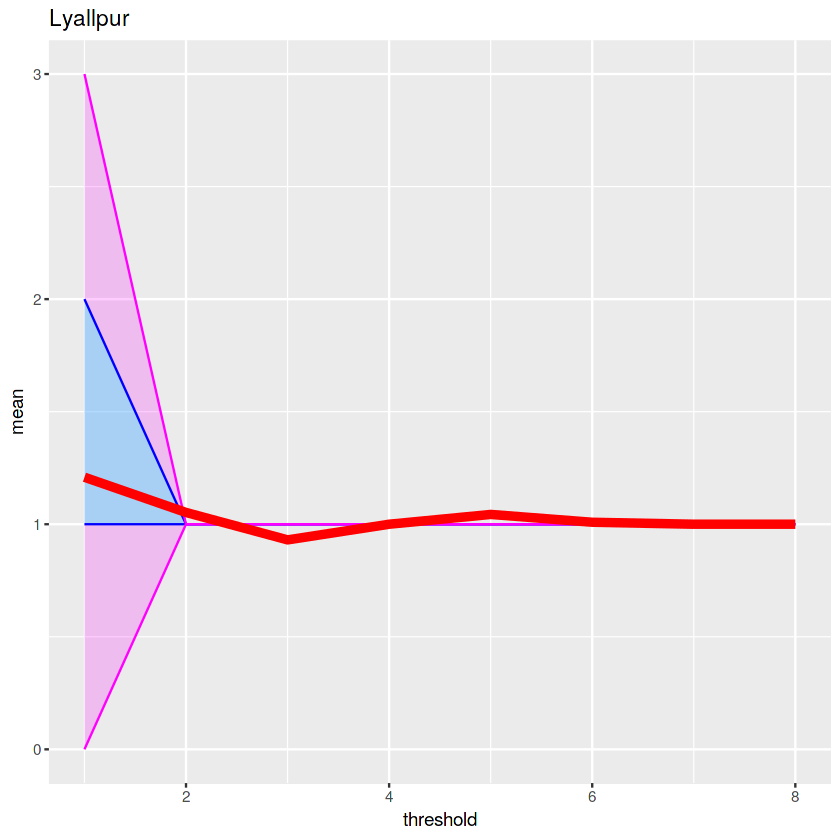

In [180]:
ggplot(data = dfsumary, aes(x=threshold, y=mean))+
    geom_ribbon(aes(x=threshold, ymin=box1, ymax=box5), fill="magenta", alpha=.2) +
    geom_ribbon(aes(x=threshold, ymin=box2, ymax=box4), fill="cyan", alpha=.3) +
    geom_line(aes(y = box2), colour = 'blue') +
    geom_line(aes(y = box4), colour = 'blue') +
    geom_line(aes(y = box1), colour = 'magenta') +
    geom_line(aes(y = box5), colour = 'magenta') +
    geom_line(colour='red', size=2) +
    ggtitle(parent)

In [182]:
sumary <- t(sapply(ect, function(x) c(mean=mean(x), var=var(x), sd=sd(x),
                                      box=grDevices::boxplot.stats(x)$stats)))
dfsumary2 <- as.data.frame(sumary)
dfsumary2['threshold'] <- 1:TT
dfsumary2['upper'] <- sumary[,1] + sumary[,3]
dfsumary2['lower'] <- sumary[,1] - sumary[,3]
dfsumary2

,mean,var,sd,box1,box2,box3,box4,box5,threshold,upper,lower
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
X5511,1.0446429,1.91690798,1.3845245,-2,0,1,2,5,1,2.429167,-0.33988160
X5519,0.9553571,1.07006113,1.0344376,1,1,1,1,1,2,1.989795,-0.07908045
X5527,1.0535714,0.39350064,0.6272963,1,1,1,1,1,3,1.680868,0.42627513
X5535,0.9910714,0.31523488,0.5614578,1,1,1,1,1,4,1.552529,0.42961361
X5543,1.0535714,0.06917632,0.2630139,1,1,1,1,1,5,1.316585,0.79055751
X5551,1.0000000,0.10810811,0.3287980,1,1,1,1,1,6,1.328798,0.67120203
X5559,0.9910714,0.02694659,0.1641542,1,1,1,1,1,7,1.155226,0.82691726
X5567,1.0000000,0.00000000,0.0000000,1,1,1,1,1,8,1.000000,1.00000000


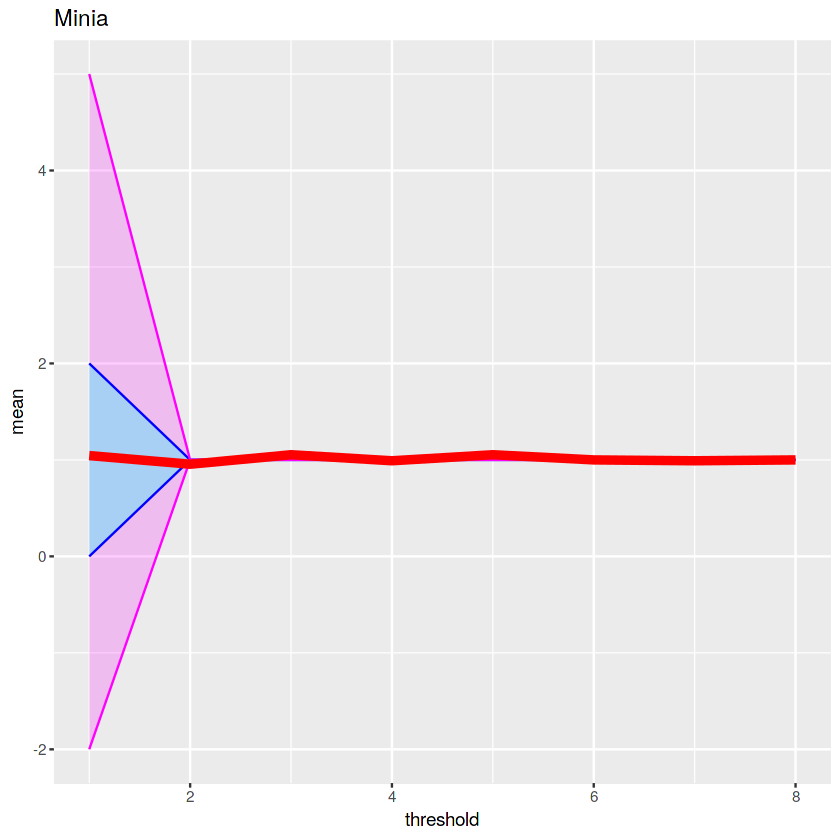

In [184]:
ggplot(data = dfsumary2, aes(x=threshold, y=mean))+
    geom_ribbon(aes(x=threshold, ymin=box1, ymax=box5), fill="magenta", alpha=.2) +
    geom_ribbon(aes(x=threshold, ymin=box2, ymax=box4), fill="cyan", alpha=.3) +
    geom_line(aes(y = box2), colour = 'blue') +
    geom_line(aes(y = box4), colour = 'blue') +
    geom_line(aes(y = box1), colour = 'magenta') +
    geom_line(aes(y = box5), colour = 'magenta') +
    geom_line(colour='red', size=2) +
    ggtitle(parent)

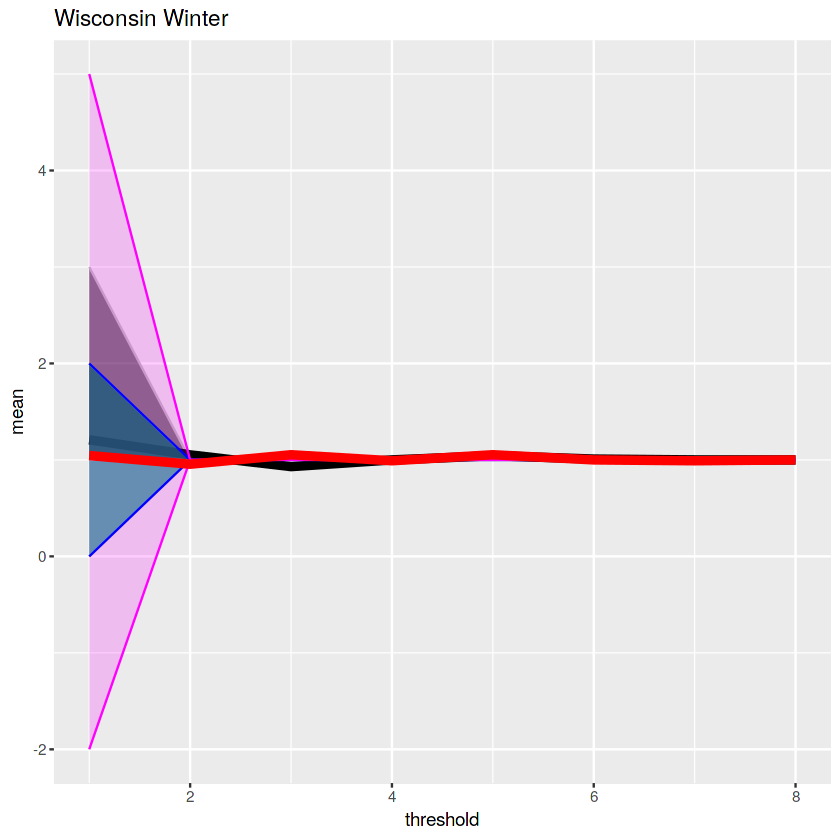

In [192]:
ggplot(data = dfsumary, aes(x=threshold, y=mean))+
    geom_ribbon(aes(x=threshold, ymin=box1, ymax=box5), fill="black", alpha=.5) +
    geom_ribbon(aes(x=threshold, ymin=box2, ymax=box4), fill="black", alpha=.75) +
    geom_line(aes(y = box2), colour = 'gray') +
    geom_line(aes(y = box4), colour = 'gray') +
    geom_line(aes(y = box1), colour = 'gray') +
    geom_line(aes(y = box5), colour = 'gray') +
    geom_line(colour='black', size=2) +
    ggtitle(parent) +
    geom_ribbon(data= dfsumary2, aes(x=threshold, ymin=box1, ymax=box5), fill="magenta", alpha=.2) +
    geom_ribbon(data= dfsumary2, aes(x=threshold, ymin=box2, ymax=box4), fill="cyan", alpha=.3) +
    geom_line(data= dfsumary2, aes(y = box2), colour = 'blue') +
    geom_line(data= dfsumary2, aes(y = box4), colour = 'blue') +
    geom_line(data= dfsumary2, aes(y = box1), colour = 'magenta') +
    geom_line(data= dfsumary2, aes(y = box5), colour = 'magenta') +
    geom_line(data= dfsumary2, colour='red', size=2)

# Fix direction
# Loop along all founders

In [365]:
direction <- 112
ect_traits <- topo_traits[(TT*(direction-1)+1):(TT*direction)]
ect_traits

ect <- list()
i <- 1
for(parent in founders_names_original){
    ectt <- founders[founders['Founder'] == parent, ect_traits]
    sumary <- t(sapply(ectt, function(x) c(mean=mean(x), var=var(x), sd=sd(x),
                                      box=grDevices::boxplot.stats(x)$stats)))
    ect[[i]] <- as.data.frame(sumary)
    ect[[i]]['threshold'] <- 1:TT
    ect[[i]]['upper'] <- sumary[,1] + sumary[,3]
    ect[[i]]['lower'] <- sumary[,1] - sumary[,3]
    i <- i + 1
}

[1] "X7111" "X7119" "X7127" "X7135" "X7143" "X7151" "X7159" "X7167"

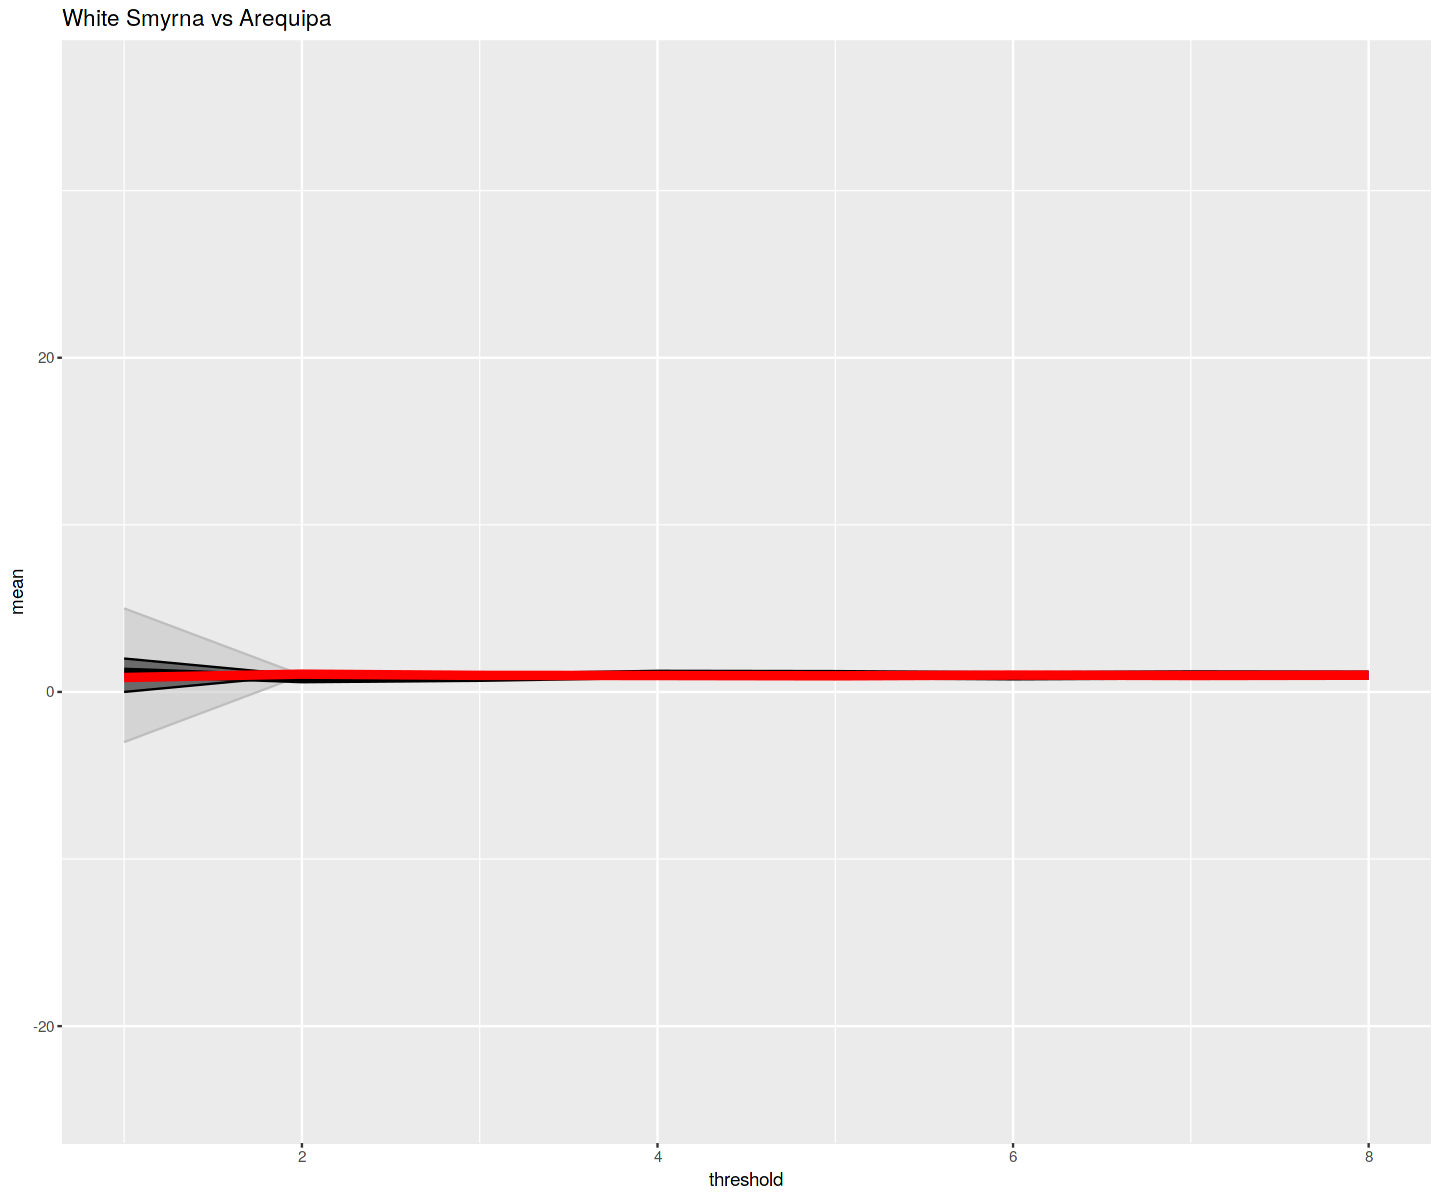

In [367]:
i <- 27
j <- 3
p <- ggplot(data = ect[[i]], aes(x=threshold, y=mean))+
    geom_ribbon(aes(x=threshold, ymin=box1, ymax=box5), fill="grey", alpha=.50) +
    geom_ribbon(aes(x=threshold, ymin=box2, ymax=box4), fill="black", alpha=.50) +
    geom_line(aes(y = box2), colour = 'black') +
    geom_line(aes(y = box4), colour = 'black') +
    geom_line(aes(y = box1), colour = 'gray') +
    geom_line(aes(y = box5), colour = 'gray') +
    geom_line(colour='black', size=2) +
    ggtitle(paste(founders_names[i], 'vs', founders_names[j])) +
    geom_ribbon(data= ect[[j]], aes(x=threshold, ymin=box1, ymax=box5), fill="magenta", alpha=0.5) +
    geom_ribbon(data= ect[[j]], aes(x=threshold, ymin=box2, ymax=box4), fill="cyan", alpha=0.5) +
    geom_line(data= ect[[j]], aes(y = box2), colour = 'blue') +
    geom_line(data= ect[[j]], aes(y = box4), colour = 'blue') +
    geom_line(data= ect[[j]], aes(y = box1), colour = 'magenta') +
    geom_line(data= ect[[j]], aes(y = box5), colour = 'magenta') +
    geom_line(data= ect[[j]], colour='red', size=2) +
    ylim(-24, 36)
p

In [368]:
sum((ect[[i]]['mean'] - ect[[j]]['mean'])**2)

[1] 0.1940454

In [369]:
meandiffs <- matrix(0, length(ect), length(ect))
for(i in 1:length(ect)){
    for(j in i:length(ect)){
        meandiffs[i,j] <- sum((ect[[i]]['mean'] - ect[[j]]['mean'])**2)
        meandiffs[j,i] <- sum((ect[[i]]['mean'] - ect[[j]]['mean'])**2)
    }
}
dfdiff <- as.data.frame(meandiffs)
colnames(dfdiff) <- founders_names
rownames(dfdiff) <- founders_names
max(dfdiff)
which(dfdiff == max(dfdiff), arr.ind=TRUE)
dfdiff['Founder'] <- founders_names

[1] 0.6301357

,row,col
Orel,23,3
Arequipa,3,23


In [334]:
mdfdiff <- reshape2::melt(dfdiff, id.vars='Founder')

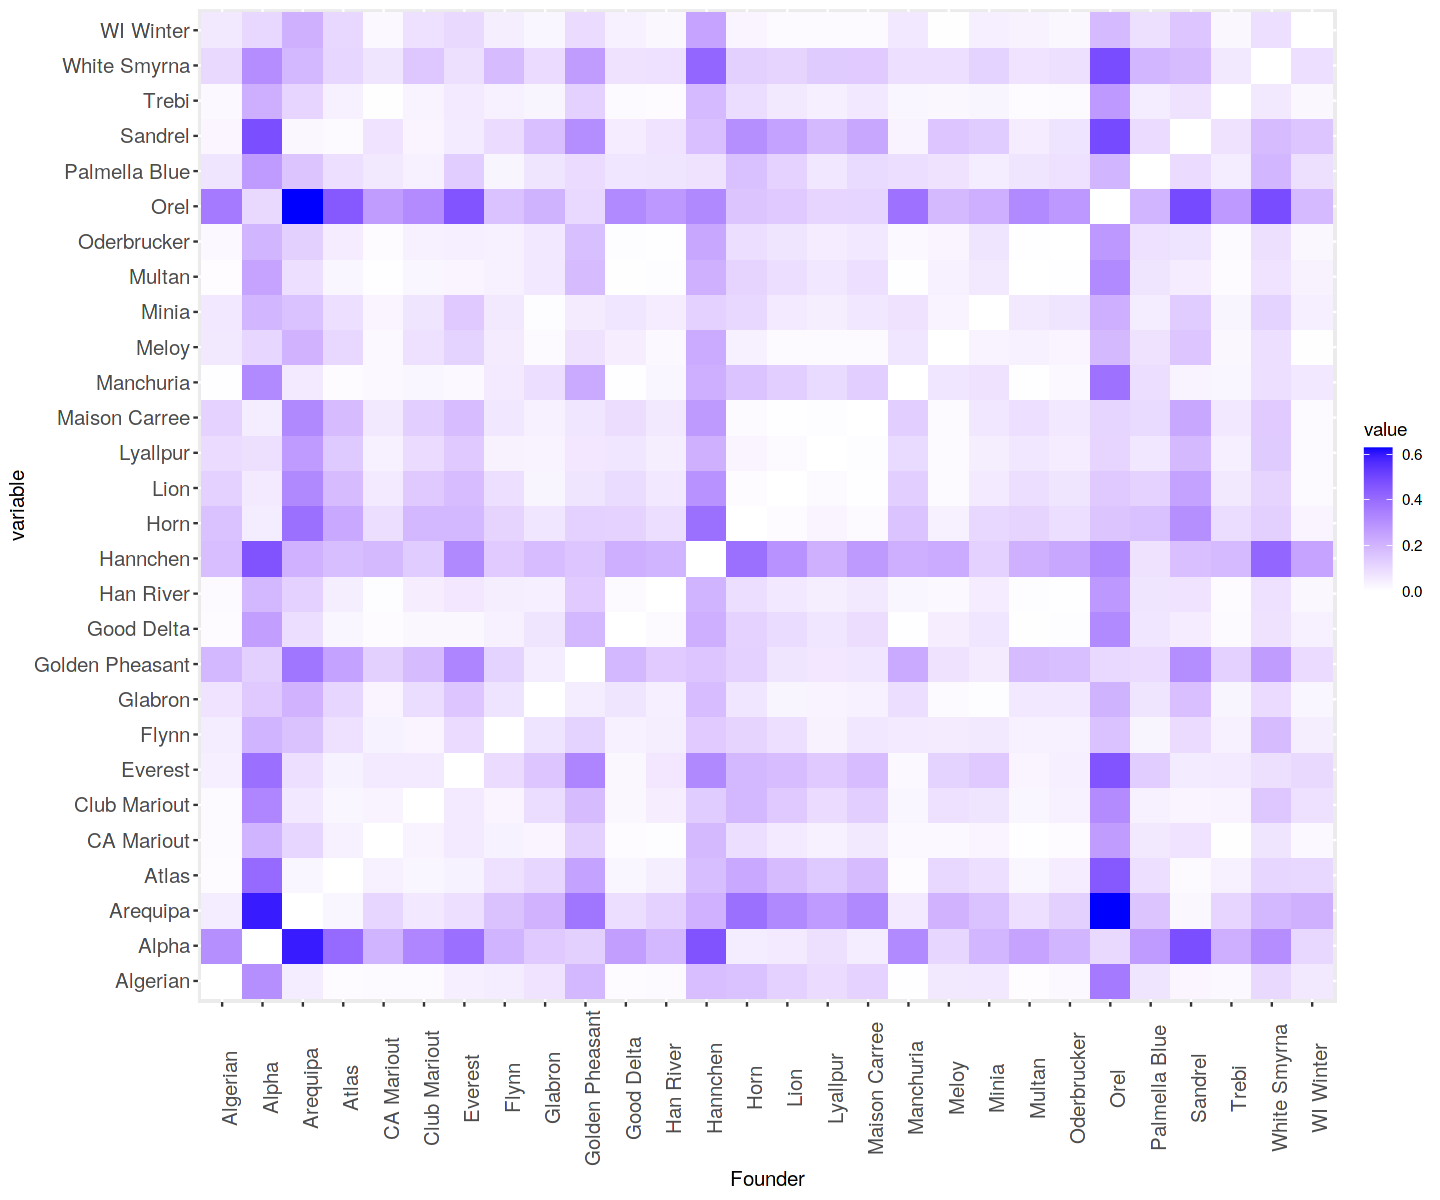

In [370]:
options(repr.plot.width=12, repr.plot.height=10)
ggplot(mdfdiff, aes(Founder, variable, fill= value)) + 
  geom_tile() +
  scale_fill_gradient(low="white", high="blue") +
  theme(plot.title = element_text(hjust = 0.5, vjust = -1, size=15),
          axis.text.x = element_text(size = 12, angle=90),
          axis.text.y = element_text(size = 12),
          axis.title = element_text(size=12))

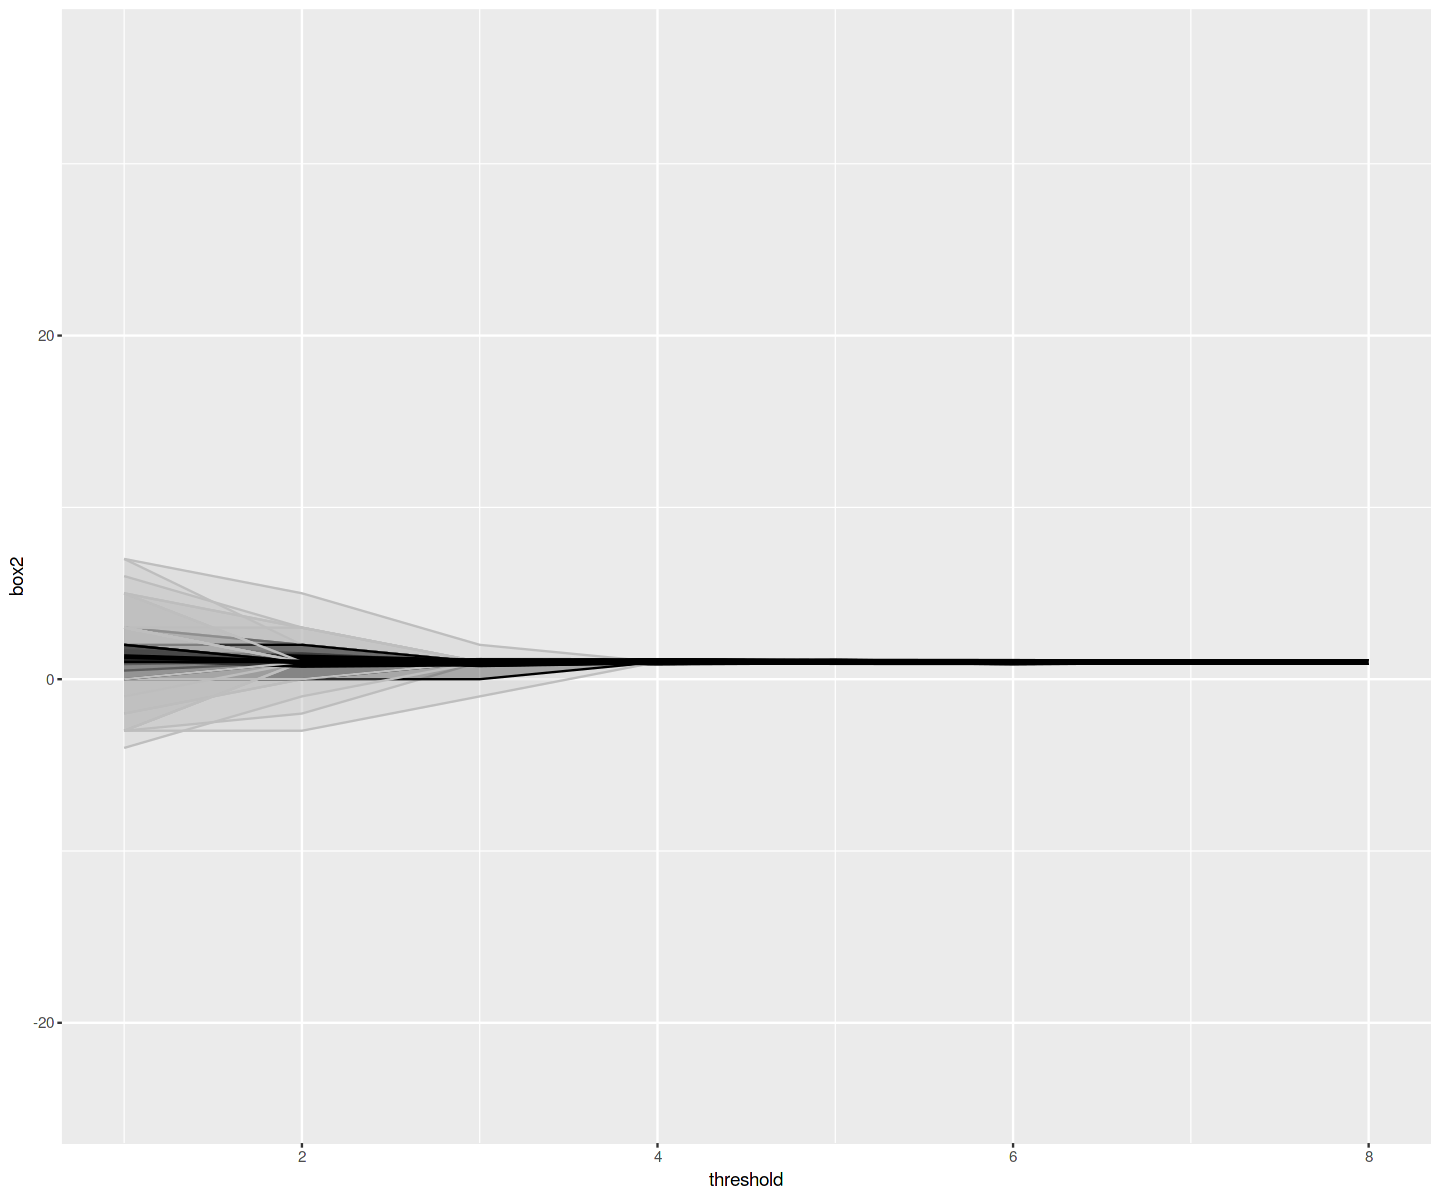

In [371]:
p <- ggplot() + ylim(-24, 36)
for(i in 1:length(ect)){
    p <- p +
    geom_ribbon(data = ect[[i]], aes(x=threshold, ymin=box1, ymax=box5), fill="grey", alpha=.25) +
    geom_ribbon(data = ect[[i]], aes(x=threshold, ymin=box2, ymax=box4), fill="black", alpha=.25) +
    geom_line(data = ect[[i]], aes(x=threshold, y = box2), colour = 'black') +
    geom_line(data = ect[[i]], aes(x=threshold, y = box4), colour = 'black') +
    geom_line(data = ect[[i]], aes(x=threshold, y = box1), colour = 'gray') +
    geom_line(data = ect[[i]], aes(x=threshold, y = box5), colour = 'gray') +
    geom_line(data = ect[[i]], aes(x=threshold, y = mean), colour='black', size=1)
}
p

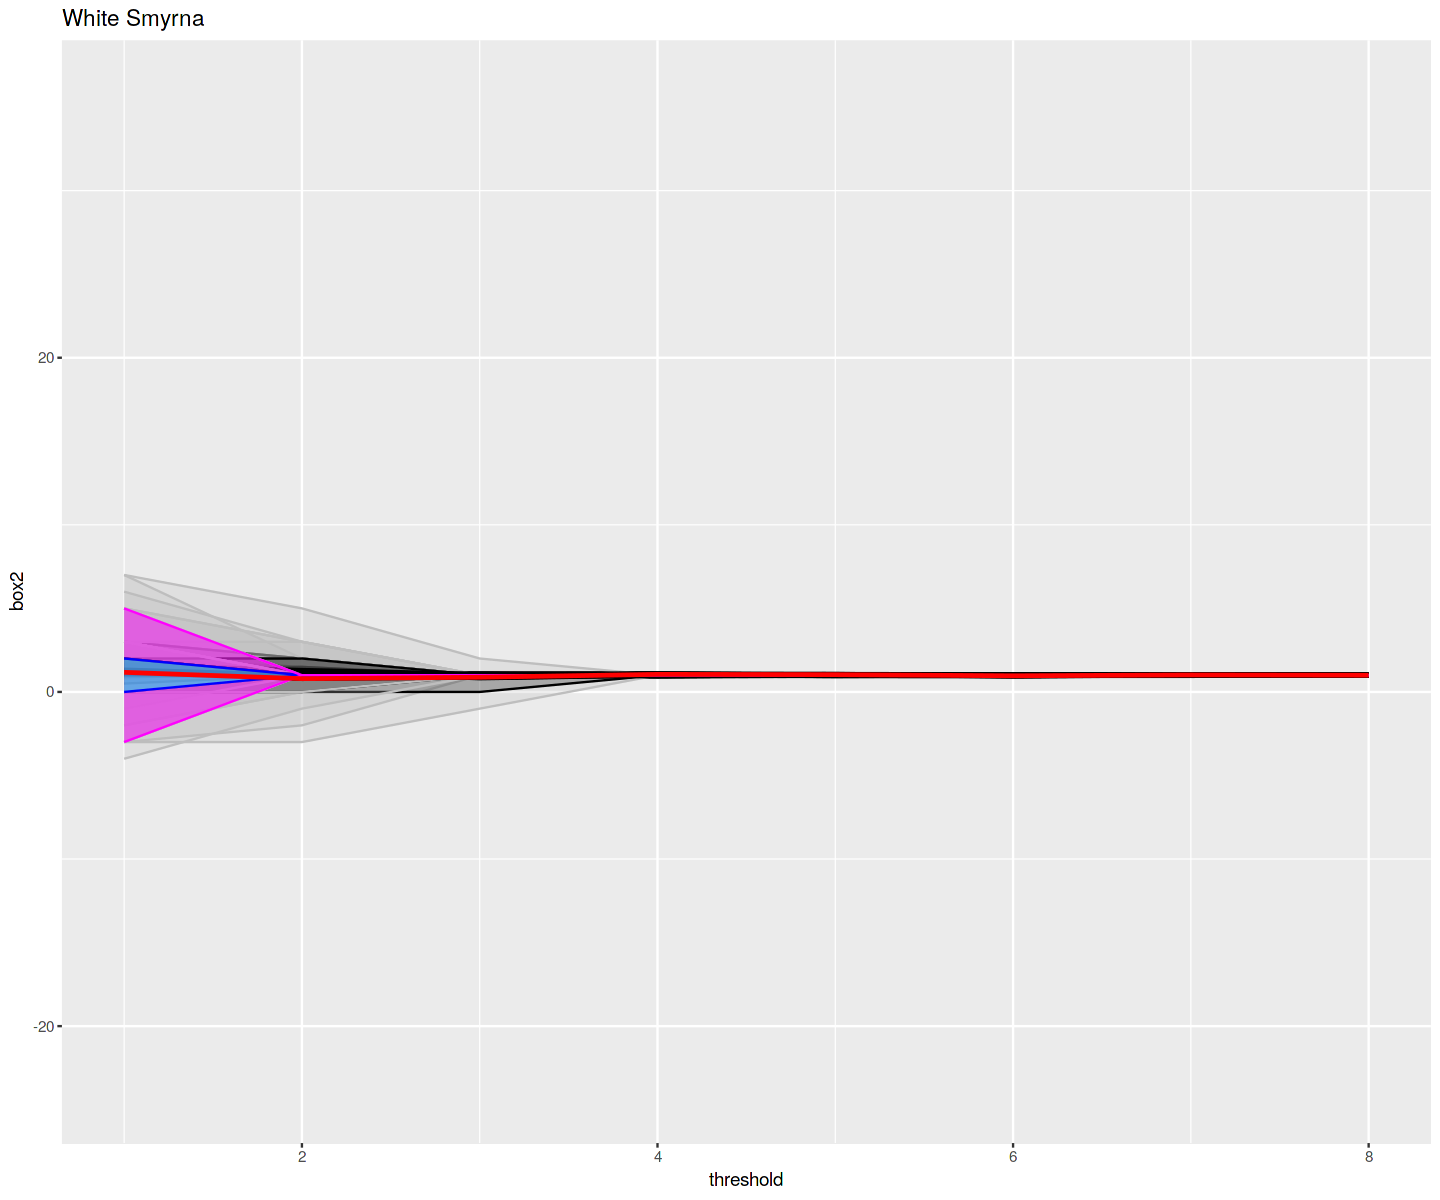

In [372]:
i <- 27
q <- p + ggtitle(paste(founders_names[i])) +
    geom_ribbon(data= ect[[i]], aes(x=threshold, ymin=box1, ymax=box5), fill="magenta", alpha=0.5) +
    geom_ribbon(data= ect[[i]], aes(x=threshold, ymin=box2, ymax=box4), fill="cyan", alpha=0.5) +
    geom_line(data= ect[[i]], aes(x=threshold, y = box2), colour = 'blue') +
    geom_line(data= ect[[i]], aes(x=threshold, y = box4), colour = 'blue') +
    geom_line(data= ect[[i]], aes(x=threshold, y = box1), colour = 'magenta') +
    geom_line(data= ect[[i]], aes(x=threshold, y = box5), colour = 'magenta') +
    geom_line(data= ect[[i]], aes(x=threshold, y = mean), colour='red', size=1)
q

In [373]:
i <- 27
for(i in 1:length(ect)){
q <- p + ggtitle(paste(founders_names[i])) +
    geom_ribbon(data= ect[[i]], aes(x=threshold, ymin=box1, ymax=box5), fill="magenta", alpha=0.5) +
    geom_ribbon(data= ect[[i]], aes(x=threshold, ymin=box2, ymax=box4), fill="cyan", alpha=0.5) +
    geom_line(data= ect[[i]], aes(x=threshold, y = box2), colour = 'blue') +
    geom_line(data= ect[[i]], aes(x=threshold, y = box4), colour = 'blue') +
    geom_line(data= ect[[i]], aes(x=threshold, y = box1), colour = 'magenta') +
    geom_line(data= ect[[i]], aes(x=threshold, y = box5), colour = 'magenta') +
    geom_line(data= ect[[i]], aes(x=threshold, y = mean), colour='red', size=1)
filename <- paste('d158_T8_dir',direction,'/', founders_names[i], sep='')
ggplot2::ggsave(paste(filename,'.png', sep=''), plot=q, device='png', width=5, height=5)
}

In [327]:
filename <- paste('d158_T8_dir',direction,'/', founders_names[i], sep='')
ggplot2::ggsave(paste(filename,'.png', sep=''), plot=q, device='png', width=5, height=5)
#ggplot2::ggsave(paste(filename,'.pdf', sep=''), plot=q, device='pdf', width=5, height=5)

# Inter-class/Intra-class variation

In [89]:
xi <- 1
overall_mean <- mean(founders[, topo_traits[xi]])
overall_var <- var(founders[, topo_traits[xi]])
overall_mean
overall_var

[1] 1.52355

[1] 100.5175

In [90]:
parent <- 'Minia'
intra_mean <- 1:length(founders_names)
intra_vars <- 1:length(intra_mean)
intra_N <- 1:length(intra_mean)
for(i in 1:length(intra_mean)){
    ect <- founders[founders['Founder'] == founders_names_original[i], topo_traits[xi]]
    intra_mean[i] <- mean(ect)
    intra_vars[i] <- var(ect)
    intra_N[i] <- length(ect)
}
intra_mean
intra_vars
intra_N

[1]  4.09722222  3.70000000 -5.08181818  1.63636364  1.06349206  2.17919075
 [7]  0.83593750  4.25641026  1.45614035 -1.23595506  1.22222222  4.71830986
[13]  1.43820225  1.50000000  0.04310345 -2.35652174  1.18493151  1.18562874
[19]  1.05660377  1.16071429 -2.74000000  1.18556701  7.27027027  0.33898305
[25]  1.77083333  2.63025210 13.81034483  0.00000000

[1] 339.85062  35.96517 399.04829  21.74462  34.58105 115.90375  36.39019
 [8]  80.34898  27.02903 197.06869  82.35022  24.00523  28.24898  25.05670
[15]  22.78943  63.52967 106.08281  16.67015  54.53475 136.20817 149.91061
[22]  35.70632 184.93965  95.22794  49.33640  18.62484 451.80551  18.50000

[1] 144  90 110 132 189 173 128  78 114  89 126  71  89  98 116 115 146 167 159
[20] 112  50 194  74  59  96 119  58  25

In [91]:
# Weighted variance of class means

inter_var <- sum(intra_N*(intra_mean - overall_mean)**2)/nrow(founders)
round(inter_var,2)

[1] 7.32

In [92]:
# Weighted mean of intra-class variations

intra_var <- sum(intra_N*intra_vars)/nrow(founders)
round(intra_var,2)

[1] 94.08

In [93]:
mean(intra_mean)
mean(intra_vars)

var(intra_mean)
var(intra_vars)

[1] 1.725944

[1] 101.8378

[1] 11.31417

[1] 13657.86

In [81]:
xi <- 1

inter_var <- 1:length(topo_traits)
intra_var <- 1:length(topo_traits)

for(xi in 1:length(topo_traits)){

    overall_mean <- mean(founders[, topo_traits[xi]])
    overall_var <- var(founders[, topo_traits[xi]])
    overall_mean
    overall_var

    intra_mean <- 1:length(founders_names)
    intra_vars <- 1:length(intra_mean)
    intra_N <- 1:length(intra_mean)
    for(i in 1:length(intra_mean)){
        ect <- founders[founders['Founder'] == founders_names_original[i], topo_traits[xi]]
        intra_mean[i] <- mean(ect)
        intra_vars[i] <- var(ect)
        intra_N[i] <- length(ect)
    }
    
    inter_var[xi] <- sum(intra_N*(intra_mean - overall_mean)**2)/nrow(founders)
    intra_var[xi] <- sum(intra_N*intra_vars)/nrow(founders)
}

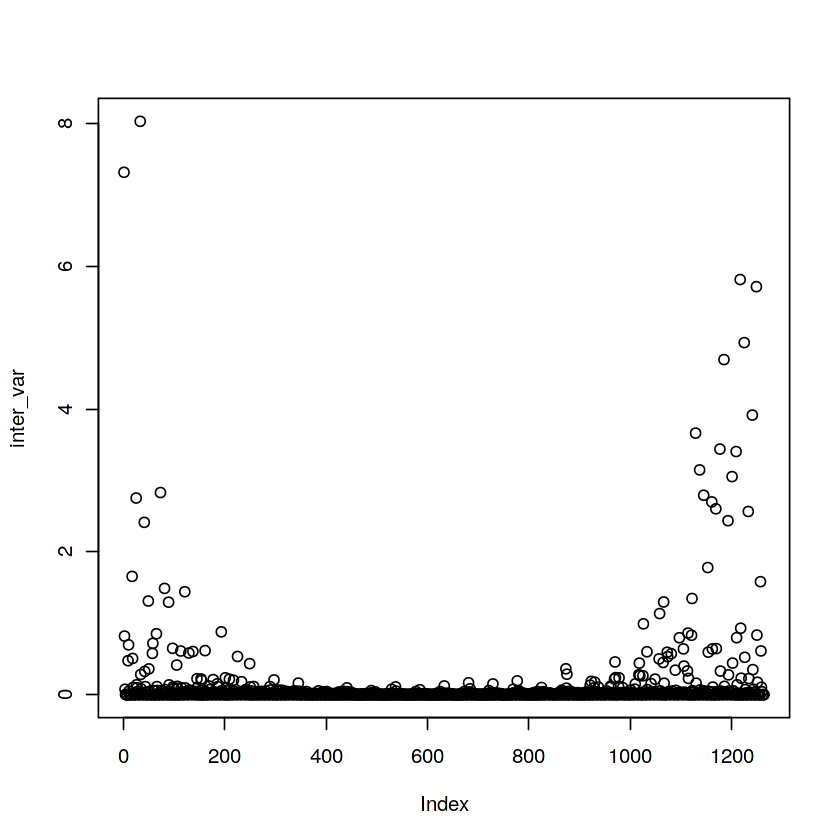

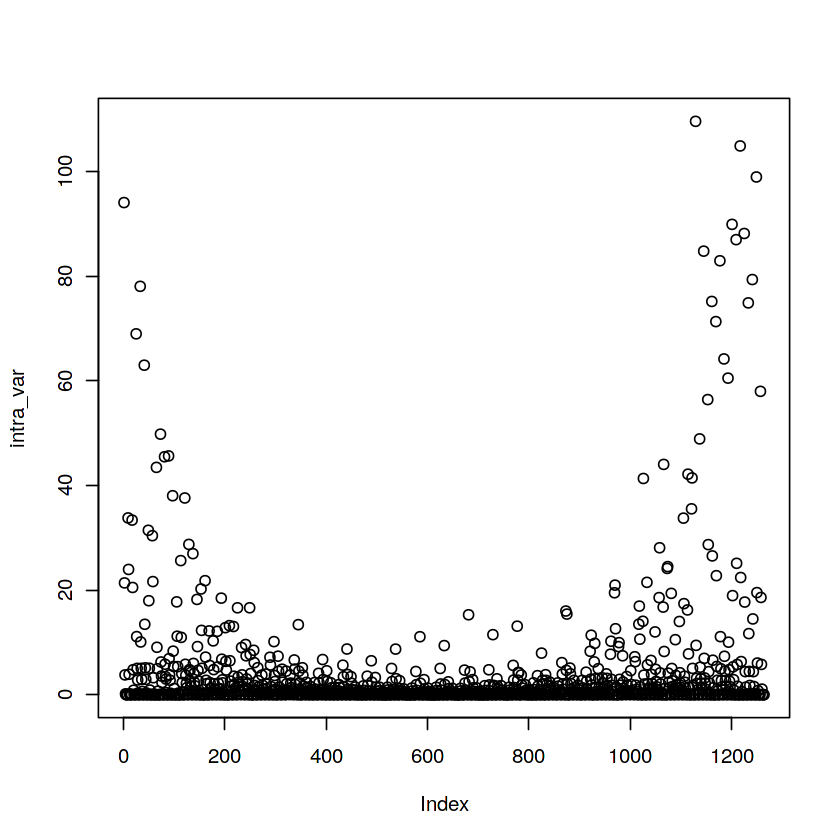

In [88]:
plot(inter_var)
plot(intra_var)